<a href="https://colab.research.google.com/github/LYZAcell/data_study/blob/main/BDA(%ED%8C%90%EB%8B%A4%EC%8A%A4)/%EA%B3%BC%EC%A0%9C/250126_%EC%9D%B4%EA%B0%80%EC%98%8141_%EB%B3%B5%EC%8A%B5%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

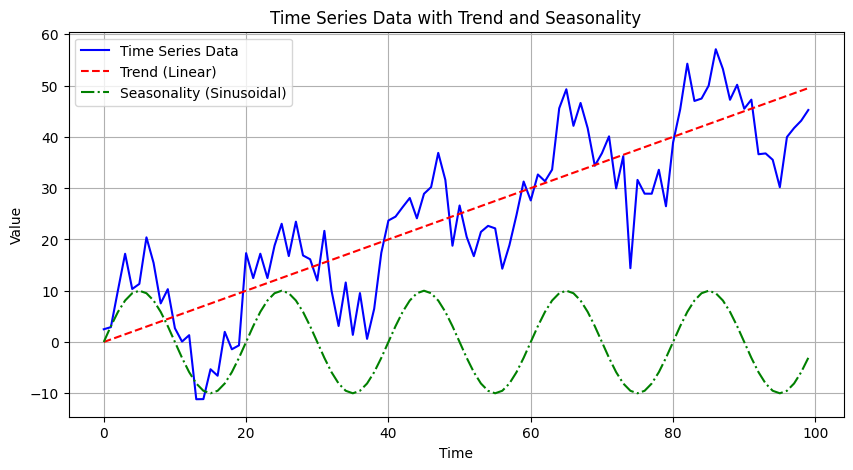

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 시계열 데이터 생성 (추세 + 계절성 + 노이즈)
np.random.seed(42)
time = np.arange(0, 100)
trend = 0.5 * time  # 선형 추세
seasonality = 10 * np.sin(2 * np.pi * time / 20)  # 계절성 (주기 20)
noise = np.random.normal(0, 5, size=len(time))  # 랜덤 노이즈

# 전체 시계열 데이터
data = trend + seasonality + noise

# 데이터프레임으로 구성
df = pd.DataFrame({'Time': time, 'Value': data})

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(df['Time'], df['Value'], label='Time Series Data', color='blue')
plt.plot(df['Time'], trend, label='Trend (Linear)', color='red', linestyle='--')
plt.plot(df['Time'], seasonality, label='Seasonality (Sinusoidal)', color='green', linestyle='-.')
plt.title('Time Series Data with Trend and Seasonality')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

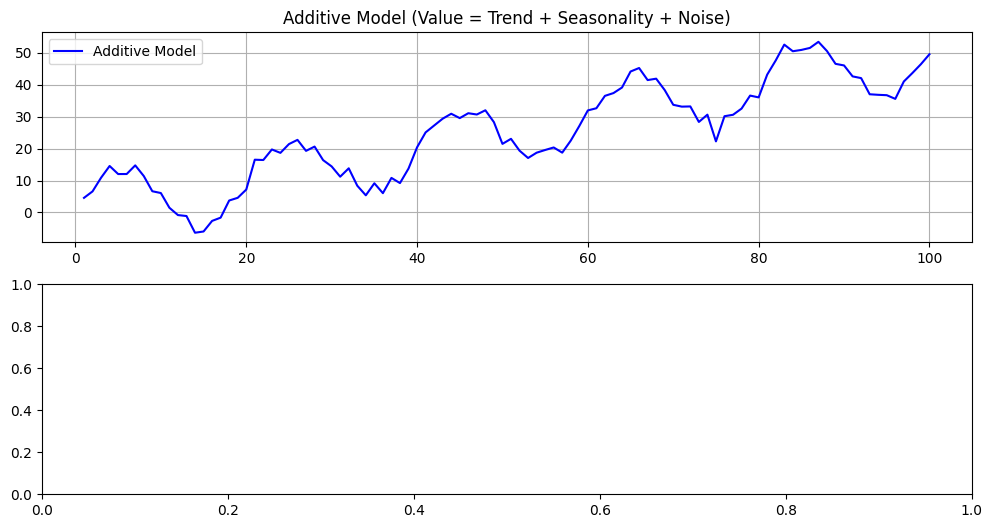

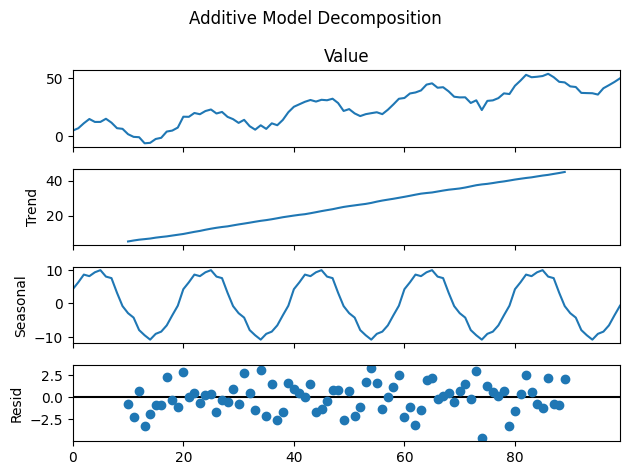

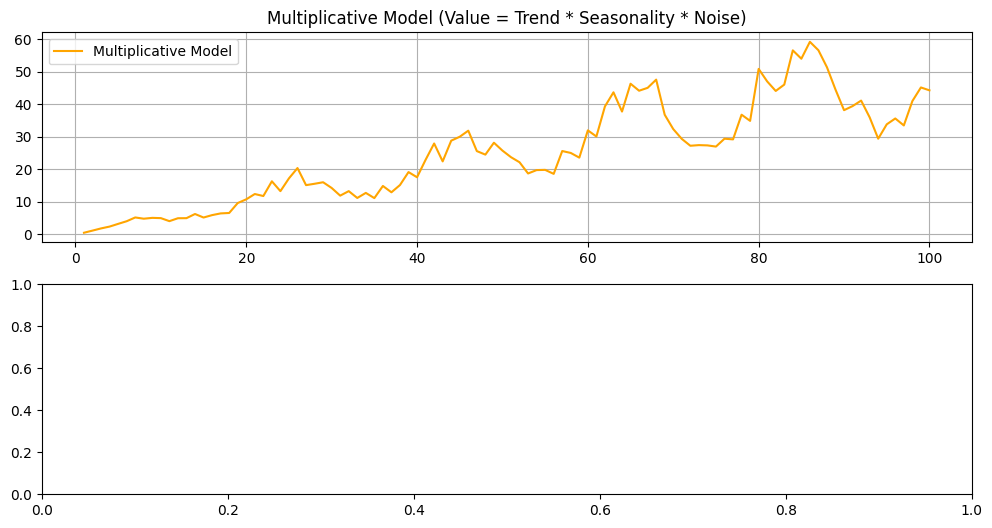

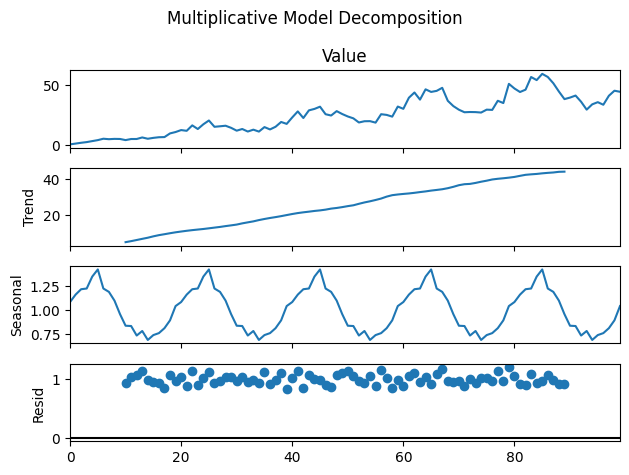

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 데이터 생성 (추세 + 계절성 + 노이즈)
np.random.seed(42)
time = np.arange(1, 101)
trend = 0.5 * time  # 선형 추세

# 가법(+) 모델
seasonality_add = 10 * np.sin(2 * np.pi * time / 20)
data_additive = trend + seasonality_add + np.random.normal(0, 2, len(time))

# 승법(*) 모델
seasonality_mult = 1 + 0.3 * np.sin(2 * np.pi * time / 20)
data_multiplicative = trend * seasonality_mult * (1 + np.random.normal(0, 0.1, len(time)))

# 데이터프레임 생성
df_add = pd.DataFrame({'Time': time, 'Value': data_additive})
df_mult = pd.DataFrame({'Time': time, 'Value': data_multiplicative})

# 가법 모델 분해
result_add = seasonal_decompose(df_add['Value'], model='additive', period=20)
result_mult = seasonal_decompose(df_mult['Value'], model='multiplicative', period=20)

# 시각화 (가법 모델)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df_add['Time'], df_add['Value'], label='Additive Model', color='blue')
plt.title('Additive Model (Value = Trend + Seasonality + Noise)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
result_add.plot()
plt.suptitle('Additive Model Decomposition')
plt.tight_layout()
plt.show()

# 시각화 (승법 모델)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df_mult['Time'], df_mult['Value'], label='Multiplicative Model', color='orange')
plt.title('Multiplicative Model (Value = Trend * Seasonality * Noise)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
result_mult.plot()
plt.suptitle('Multiplicative Model Decomposition')
plt.tight_layout()
plt.show()

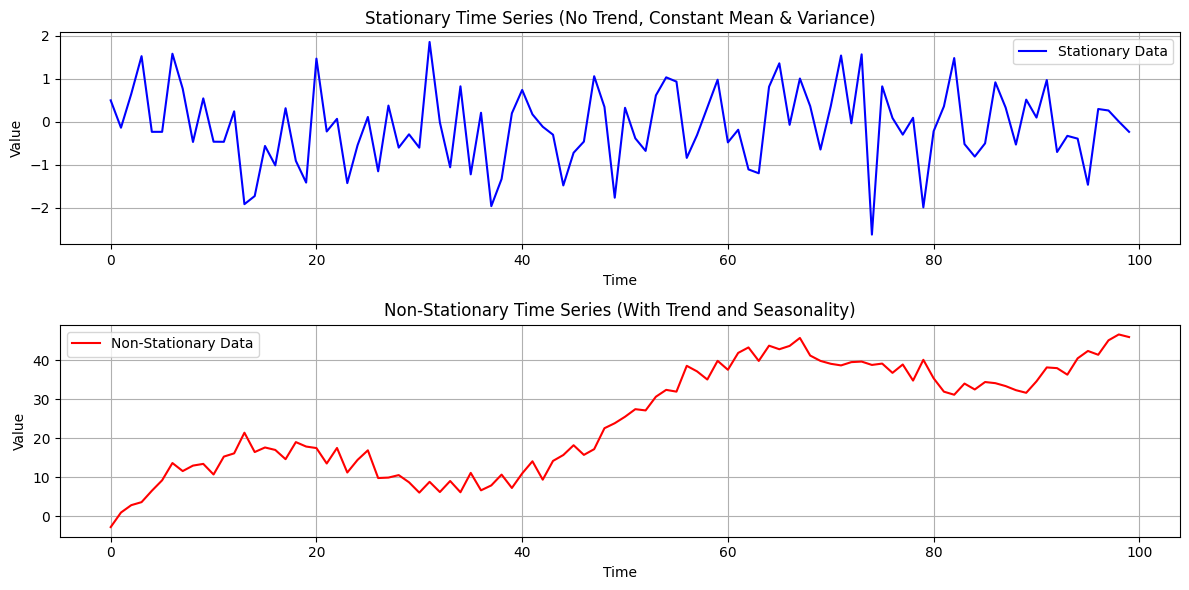

In [ ]:


# 랜덤 시드 설정
np.random.seed(42)

# 정상성 데이터 생성 (평균과 분산이 일정)
time = np.arange(100)
stationary_data = np.random.normal(loc=0, scale=1, size=100)

# 비정상성 데이터 생성 (추세가 존재)
trend = 0.5 * time
seasonality = 10 * np.sin(2 * np.pi * time / 50)
non_stationary_data = trend + seasonality + np.random.normal(loc=0, scale=2, size=100)

# 데이터프레임 생성
df = pd.DataFrame({
    'Time': time,
    'Stationary': stationary_data,
    'Non_Stationary': non_stationary_data
})

# 정상성과 비정상성 시각적 비교
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df['Time'], df['Stationary'], label='Stationary Data', color='blue')
plt.title('Stationary Time Series (No Trend, Constant Mean & Variance)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(df['Time'], df['Non_Stationary'], label='Non-Stationary Data', color='red')
plt.title('Non-Stationary Time Series (With Trend and Seasonality)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Original Non-Stationary Data Tests:
ADF Test: Original Data
ADF Statistic: -0.5061268591997163
p-value: 0.890815325238321
The series is non-stationary (Fail to reject H0)
--------------------------------------------------
KPSS Test: Original Data
KPSS Statistic: 1.4618081359437394
p-value: 0.01
The series is non-stationary (Reject H0)
--------------------------------------------------
First Differenced Data Tests:
ADF Test: First Differenced Data
ADF Statistic: -4.718519089519542
p-value: 7.766408096422764e-05
The series is stationary (Reject H0)
--------------------------------------------------
KPSS Test: First Differenced Data
KPSS Statistic: 0.2910459833188886
p-value: 0.1
The series is stationary (Fail to reject H0)
--------------------------------------------------
Second Differenced Data Tests:
ADF Test: Second Differenced Data
ADF Statistic: -5.7474412285352745
p-value: 6.075192843692342e-07
The series is stationary (Reject H0)
--------------------------------------------------

<ipython-input-4-2acbafd44a5d>:33: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")
<ipython-input-4-2acbafd44a5d>:33: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")
<ipython-input-4-2acbafd44a5d>:33: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")


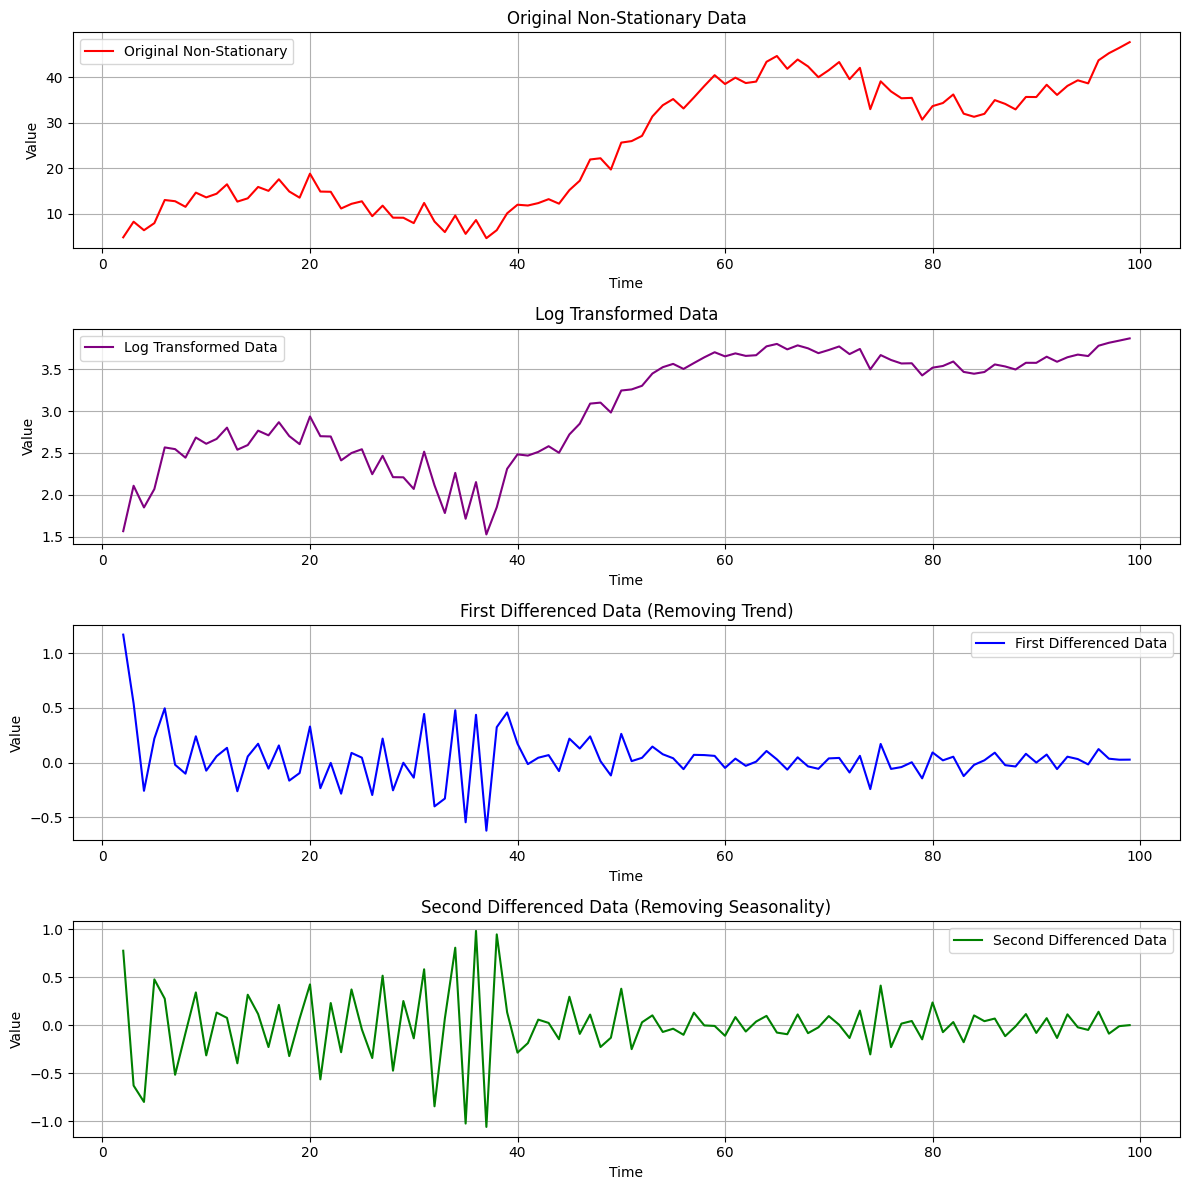

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# 데이터 생성 (비정상성 데이터)
np.random.seed(42)
time = np.arange(100)
trend = 0.5 * time  # 선형 추세
seasonality = 10 * np.sin(2 * np.pi * time / 50)
non_stationary_data = trend + seasonality + np.random.normal(loc=0, scale=2, size=100)

# 데이터프레임 생성
df = pd.DataFrame({
    'Time': time,
    'Non_Stationary': non_stationary_data
})

# ADF 테스트 함수
def adf_test(series, title):
    result = adfuller(series)
    print(f"ADF Test: {title}")
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] < 0.05:
        print("The series is stationary (Reject H0)")
    else:
        print("The series is non-stationary (Fail to reject H0)")
    print("-" * 50)

# KPSS 테스트 함수
def kpss_test(series, title):
    result = kpss(series, regression='c', nlags="auto")
    print(f"KPSS Test: {title}")
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] < 0.05:
        print("The series is non-stationary (Reject H0)")
    else:
        print("The series is stationary (Fail to reject H0)")
    print("-" * 50)

# 원본 데이터 정상성 검정
print("Original Non-Stationary Data Tests:")
adf_test(df['Non_Stationary'], "Original Data")
kpss_test(df['Non_Stationary'], "Original Data")

# 로그 변환 적용 (분산 안정화)
df['Log_Transformed'] = np.log(df['Non_Stationary'] - df['Non_Stationary'].min() + 1)

# 1차 차분 적용
df['First_Differenced'] = df['Log_Transformed'].diff()

# 2차 차분 적용
df['Second_Differenced'] = df['First_Differenced'].diff()

# NaN 값 제거
df.dropna(inplace=True)

# 1차 및 2차 차분 후 정상성 검정
print("First Differenced Data Tests:")
adf_test(df['First_Differenced'], "First Differenced Data")
kpss_test(df['First_Differenced'], "First Differenced Data")

print("Second Differenced Data Tests:")
adf_test(df['Second_Differenced'], "Second Differenced Data")
kpss_test(df['Second_Differenced'], "Second Differenced Data")

# 시각화
plt.figure(figsize=(12, 12))

# 원본 데이터 시각화
plt.subplot(4, 1, 1)
plt.plot(df['Time'], df['Non_Stationary'], label='Original Non-Stationary', color='red')
plt.title('Original Non-Stationary Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()

# 로그 변환 데이터 시각화
plt.subplot(4, 1, 2)
plt.plot(df['Time'], df['Log_Transformed'], label='Log Transformed Data', color='purple')
plt.title('Log Transformed Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()

# 1차 차분 시각화
plt.subplot(4, 1, 3)
plt.plot(df['Time'], df['First_Differenced'], label='First Differenced Data', color='blue')
plt.title('First Differenced Data (Removing Trend)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()

# 2차 차분 시각화
plt.subplot(4, 1, 4)
plt.plot(df['Time'], df['Second_Differenced'], label='Second Differenced Data', color='green')
plt.title('Second Differenced Data (Removing Seasonality)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Stationary Series ADF Test Statistic: -10.08
Stationary Series p-value: 0.0000
Stationary Series 데이터는 정상성을 만족합니다.

Non-Stationary Series ADF Test Statistic: -1.90
Non-Stationary Series p-value: 0.3332
Non-Stationary Series 데이터는 정상성을 만족하지 않습니다.

Differenced Series ADF Test Statistic: -10.81
Differenced Series p-value: 0.0000
Differenced Series 데이터는 정상성을 만족합니다.



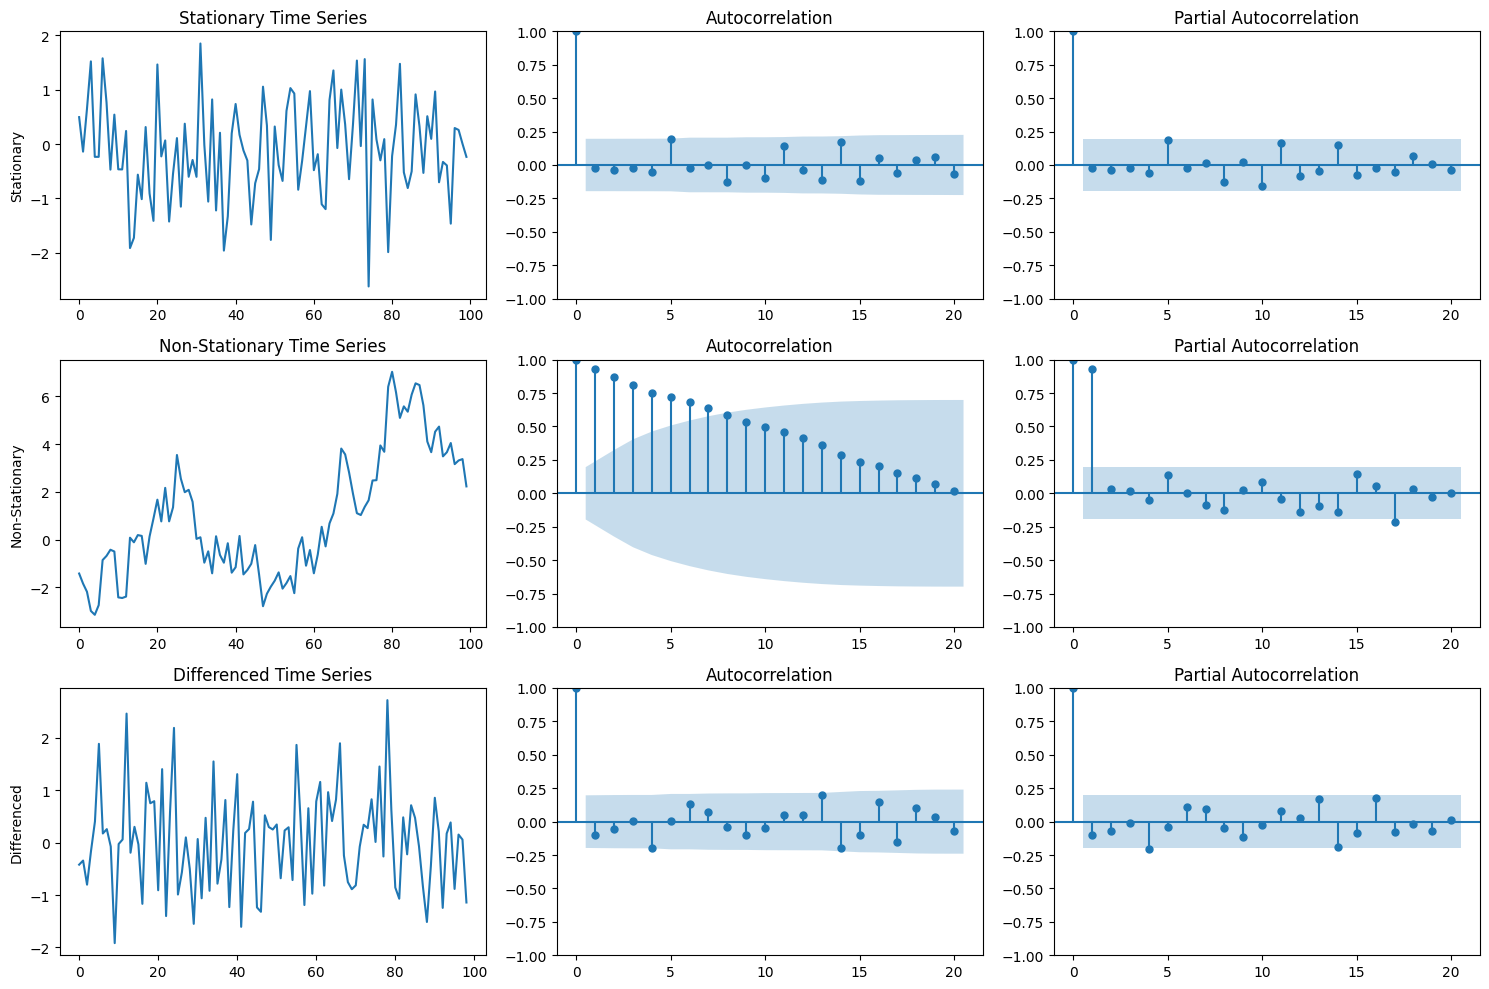

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# 시계열 데이터 생성 (정상성과 비정상성 비교)
np.random.seed(42)
n = 100

# 정상 시계열 (백색 잡음)
stationary_series = np.random.randn(n)

# 비정상 시계열 (랜덤워크 - 누적합 형태)
non_stationary_series = np.cumsum(np.random.randn(n))

# 정상성 검정 함수
def check_stationarity(series, name):
    result = adfuller(series)
    print(f'{name} ADF Test Statistic: {result[0]:.2f}')
    print(f'{name} p-value: {result[1]:.4f}')
    if result[1] < 0.05:
        print(f'{name} 데이터는 정상성을 만족합니다.\n')
    else:
        print(f'{name} 데이터는 정상성을 만족하지 않습니다.\n')

# 정상성 검정 수행
check_stationarity(stationary_series, "Stationary Series")
check_stationarity(non_stationary_series, "Non-Stationary Series")

# 비정상 시계열을 차분하여 정상성 확보 (1차 차분)
differenced_series = np.diff(non_stationary_series, n=1)
check_stationarity(differenced_series, "Differenced Series")

# 시각화 비교 (시계열 플롯, ACF, PACF)
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# 정상 시계열 시각화
axes[0, 0].plot(stationary_series)
axes[0, 0].set_title("Stationary Time Series")
plot_acf(stationary_series, lags=20, ax=axes[0, 1])
plot_pacf(stationary_series, lags=20, ax=axes[0, 2])

# 비정상 시계열 시각화
axes[1, 0].plot(non_stationary_series)
axes[1, 0].set_title("Non-Stationary Time Series")
plot_acf(non_stationary_series, lags=20, ax=axes[1, 1])
plot_pacf(non_stationary_series, lags=20, ax=axes[1, 2])

# 차분된 시계열 시각화
axes[2, 0].plot(differenced_series)
axes[2, 0].set_title("Differenced Time Series")
plot_acf(differenced_series, lags=20, ax=axes[2, 1])
plot_pacf(differenced_series, lags=20, ax=axes[2, 2])

# 제목 추가
axes[0, 0].set_ylabel("Stationary")
axes[1, 0].set_ylabel("Non-Stationary")
axes[2, 0].set_ylabel("Differenced")

plt.tight_layout()
plt.show()


ADF Test for ARMA Data (Stationary):
ADF Statistic: -5.758183165213691
p-value: 5.754147599885535e-07
The series is stationary (Reject H0)
--------------------------------------------------
ADF Test for ARIMA Data (Non-Stationary):
ADF Statistic: 0.04709642713172158
p-value: 0.9622579016066577
The series is non-stationary (Fail to reject H0)
--------------------------------------------------


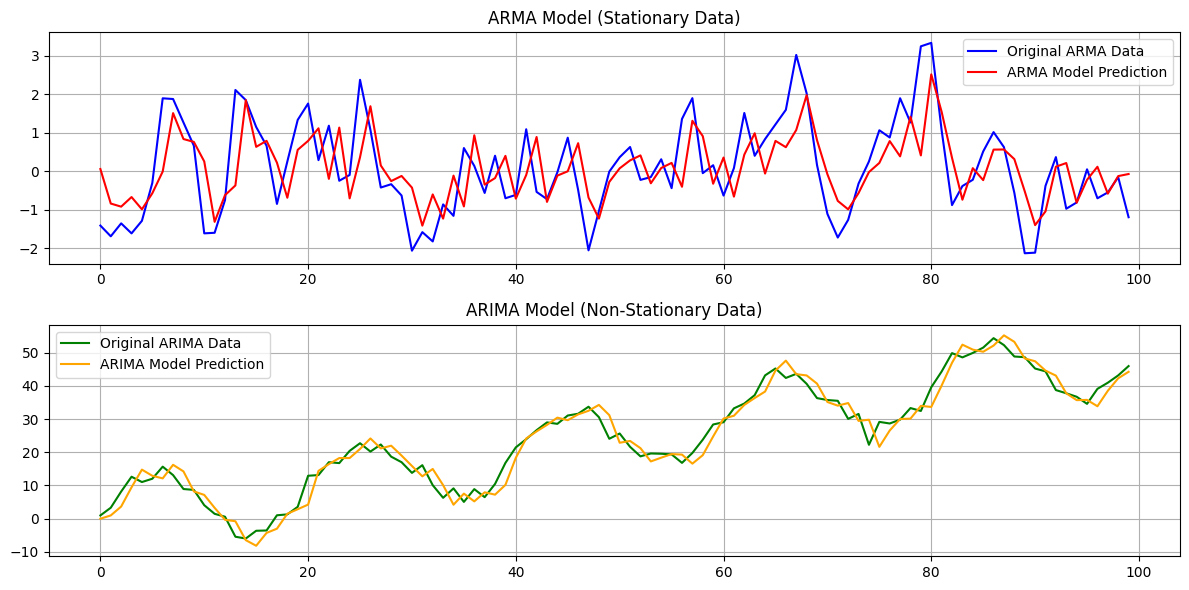

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller

# 시계열 데이터 생성 (비정상적인 데이터 포함)
np.random.seed(42)
time = np.arange(100)
trend = 0.5 * time
seasonality = 10 * np.sin(2 * np.pi * time / 20)
noise = np.random.normal(0, 2, 100)

# 정상 시계열 (ARMA)
arma_data = ArmaProcess([1, -0.5], [1, 0.4]).generate_sample(nsample=100)

# 비정상 시계열 (ARIMA 필요)
arima_data = trend + seasonality + noise

# 정상성 검정
def adf_test(series, title):
    result = adfuller(series)
    print(f"ADF Test for {title}:")
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] < 0.05:
        print("The series is stationary (Reject H0)")
    else:
        print("The series is non-stationary (Fail to reject H0)")
    print("-" * 50)

# ADF 테스트 실행
adf_test(arma_data, "ARMA Data (Stationary)")
adf_test(arima_data, "ARIMA Data (Non-Stationary)")

# ARMA 모델 적용 (정상 시계열)
arma_model = ARIMA(arma_data, order=(2, 0, 1))  # p=2, d=0, q=1
arma_result = arma_model.fit()

# ARIMA 모델 적용 (비정상 시계열 → 차분 포함)
arima_model = ARIMA(arima_data, order=(2, 1, 1))  # p=2, d=1, q=1
arima_result = arima_model.fit()

# 예측 수행
arma_pred = arma_result.predict(start=0, end=99)
arima_pred = arima_result.predict(start=0, end=99)

# 시각화
plt.figure(figsize=(12, 6))

# ARMA 시계열 결과 시각화
plt.subplot(2, 1, 1)
plt.plot(arma_data, label="Original ARMA Data", color="blue")
plt.plot(arma_pred, label="ARMA Model Prediction", color="red")
plt.title("ARMA Model (Stationary Data)")
plt.legend()
plt.grid()

# ARIMA 시계열 결과 시각화
plt.subplot(2, 1, 2)
plt.plot(arima_data, label="Original ARIMA Data", color="green")
plt.plot(arima_pred, label="ARIMA Model Prediction", color="orange")
plt.title("ARIMA Model (Non-Stationary Data)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


### **1. ARIMA 관련 패키지 (Statsmodels) 모든 메서드 및 함수 정리**

`statsmodels.tsa.arima.model.ARIMA` 클래스는 ARIMA 모델을 구축하고 분석하는 데 사용됩니다. 이 클래스에는 모델을 훈련, 예측 및 평가하는 다양한 메서드가 포함되어 있습니다.

#### **(1) 주요 메서드 정리**

| 메서드 | 설명 |
|---|---|
| `fit()` | ARIMA 모델을 학습하고 최적의 파라미터 추정 |
| `summary()` | 모델의 요약 통계 및 성능 지표 제공 |
| `predict(start, end)` | 지정된 범위의 시계열을 예측 |
| `forecast(steps)` | 미래의 지정된 스텝(기간) 예측 |
| `plot_diagnostics()` | 잔차 분석 및 진단 플롯 출력 (ACF, 히스토그램 등) |
| `get_forecast(steps)` | 신뢰구간과 함께 예측 결과 제공 |
| `get_prediction(start, end)` | 과거 데이터에 대한 예측값 반환 |
| `aic` | Akaike 정보 기준(AIC) 값 확인 |
| `bic` | Bayesian 정보 기준(BIC) 값 확인 |
| `resid` | 모델의 잔차(Residual) 확인 |
| `fittedvalues` | 모델이 적합한 예측값 반환 |
| `params` | 추정된 모델 파라미터 값 확인 |
| `pvalues` | 모델 파라미터의 유의성 검정 결과 |
| `conf_int()` | 모델 파라미터의 신뢰구간 제공 |
| `arparams` | AR(자기회귀) 파라미터 확인 |
| `maparams` | MA(이동평균) 파라미터 확인 |

---

#### **(2) 주요 속성 및 기능**

| 속성 | 설명 |
|---|---|
| `model.order` | ARIMA 모델의 (p, d, q) 차수 |
| `model.k_ar` | AR(자기회귀) 차수 |
| `model.k_ma` | MA(이동 평균) 차수 |
| `model.k_diff` | 차분(d) 차수 |
| `fittedvalues` | 훈련 데이터에서의 적합된 값(예측 결과) |
| `aic` | 모델의 AIC 값 (낮을수록 좋음) |
| `bic` | 모델의 BIC 값 (낮을수록 좋음) |
| `resid` | 모델의 잔차 값 |

---


### **3. ARIMA 모델 선택 가이드**

모델 선택 시 시계열 데이터의 정상성을 먼저 검증한 후, 다음과 같이 모델을 결정합니다:

| 데이터 유형 | 추천 모델 | 차수 조정 |
|-------------|-------------|--------------|
| 정상 데이터 | ARMA(p, q) | d=0 |
| 비정상 데이터 (추세) | ARIMA(p, d, q) | d=1 (1차 차분) |
| 비정상 데이터 (계절성) | SARIMA(p, d, q, s) | 계절 차수 포함 |

---

### **4. 모델 평가 지표**

ARIMA 모델을 평가할 때 다음과 같은 지표를 사용합니다:

1. **AIC (Akaike Information Criterion):**  
   - 모델의 적합도를 평가하는 지표. 낮을수록 좋은 모델.  
   - `model.aic`

2. **BIC (Bayesian Information Criterion):**  
   - 모델의 적합도 및 과적합을 방지하는 지표.  
   - `model.bic`

3. **RMSE (Root Mean Squared Error):**  
   - 예측 오차를 평가하는 지표.  
   ```python
   from sklearn.metrics import mean_squared_error
   rmse = np.sqrt(mean_squared_error(data[1:], model_fit.fittedvalues))
   print(f"RMSE: {rmse}")
   ```

---

### **5. 추천 작업 및 결론**

- **ADF & KPSS 검정 활용:**  
  - 비정상 시계열인 경우 차분(d)을 적용한 ARIMA 모델을 사용.  
  - 정상 시계열이면 ARMA 모델을 사용.

- **차분 후 모델 성능 비교:**  
  - 차분 전후 AIC, BIC 및 RMSE를 비교하여 최적의 차수 선택.

- **모델 평가 및 튜닝:**  
  - ACF/PACF 플롯 분석 후 적절한 `p` 및 `q` 값 조정.


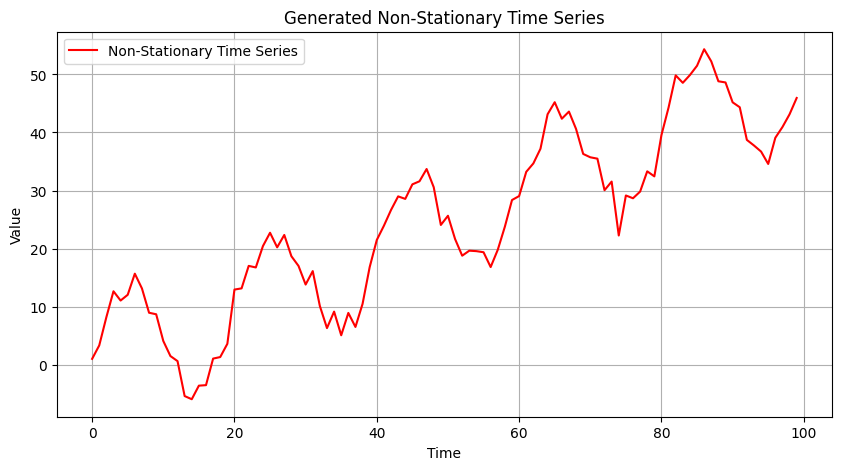

ADF Test for Original Data:
ADF Statistic: 0.04709642713172158
p-value: 0.9622579016066577
The series is non-stationary (Fail to reject H0)
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA Model Performance:
MSE: 16.87, MAE: 3.01, AIC: 543.60
--------------------------------------------------


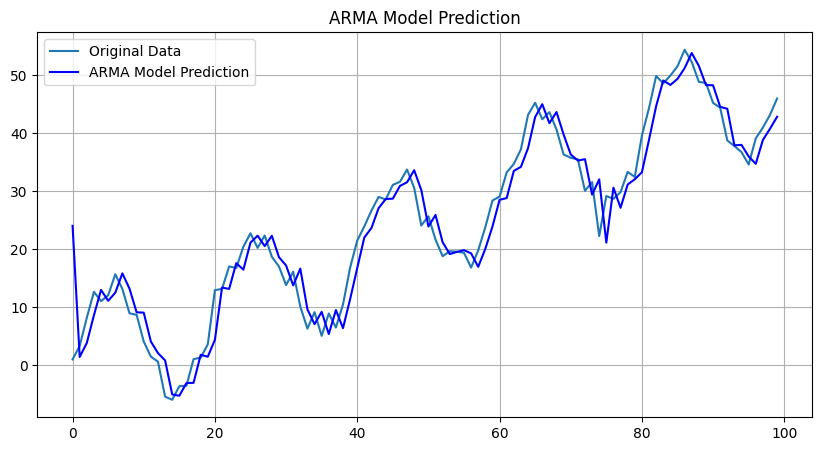

ARIMA Model Performance:
MSE: 10.33, MAE: 2.60, AIC: 520.13
--------------------------------------------------


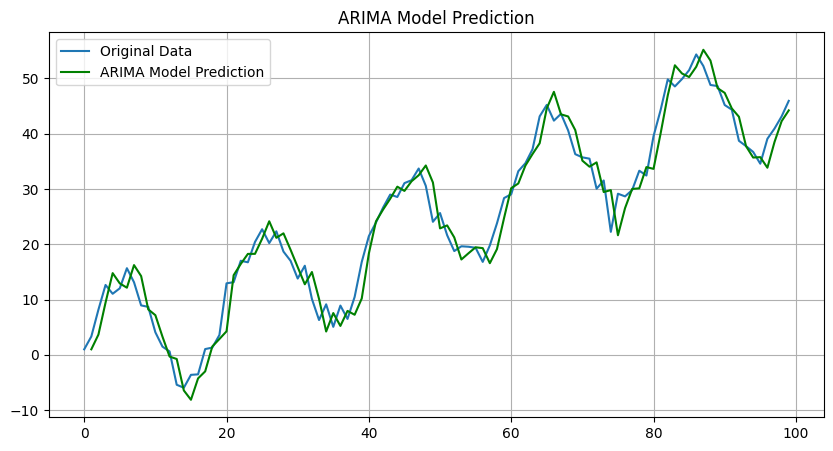


Model Comparison:
Metric     ARMA       ARIMA     
MSE        16.87     10.33
MAE        3.01     2.60
AIC        543.60   520.13


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 비정상 시계열 데이터 생성 (추세 및 계절성 포함)
np.random.seed(42)
time = np.arange(100)
trend = 0.5 * time  # 선형 추세
seasonality = 10 * np.sin(2 * np.pi * time / 20)  # 계절성
noise = np.random.normal(0, 2, 100)  # 노이즈
data = trend + seasonality + noise

# 시계열 데이터 시각화
plt.figure(figsize=(10, 5))
plt.plot(time, data, label='Non-Stationary Time Series', color='red')
plt.title('Generated Non-Stationary Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# 정상성 검정 (ADF 테스트)
def adf_test(series, title="Time Series"):
    result = adfuller(series)
    print(f"ADF Test for {title}:")
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] < 0.05:
        print("The series is stationary (Reject H0)")
    else:
        print("The series is non-stationary (Fail to reject H0)")
    print("-" * 50)

adf_test(data, "Original Data")

# ARMA 모델 적용 (비정상 데이터지만 강제 적용)
try:
    arma_model = ARIMA(data, order=(2, 0, 1))  # p=2, d=0, q=1 (비정상 시계열에는 부적절)
    arma_result = arma_model.fit()
    arma_pred = arma_result.predict(start=0, end=99)

    # 성능 평가 (ARMA)
    arma_mse = mean_squared_error(data, arma_pred)
    arma_mae = mean_absolute_error(data, arma_pred)
    print(f"ARMA Model Performance:")
    print(f"MSE: {arma_mse:.2f}, MAE: {arma_mae:.2f}, AIC: {arma_result.aic:.2f}")
    print("-" * 50)

    plt.figure(figsize=(10, 5))
    plt.plot(data, label="Original Data")
    plt.plot(arma_pred, label="ARMA Model Prediction", color="blue")
    plt.title("ARMA Model Prediction")
    plt.legend()
    plt.grid()
    plt.show()

except Exception as e:
    print("ARMA model failed due to non-stationarity:", e)

# ARIMA 모델 적용 (비정상 시계열이므로 차분 적용)
arima_model = ARIMA(data, order=(2, 1, 1))  # p=2, d=1, q=1
arima_result = arima_model.fit()
arima_pred = arima_result.predict(start=1, end=99)

# 성능 평가 (ARIMA)
arima_mse = mean_squared_error(data[1:], arima_pred)
arima_mae = mean_absolute_error(data[1:], arima_pred)

print(f"ARIMA Model Performance:")
print(f"MSE: {arima_mse:.2f}, MAE: {arima_mae:.2f}, AIC: {arima_result.aic:.2f}")
print("-" * 50)

plt.figure(figsize=(10, 5))
plt.plot(data, label="Original Data")
plt.plot(range(1, 100), arima_pred, label="ARIMA Model Prediction", color="green")
plt.title("ARIMA Model Prediction")
plt.legend()
plt.grid()
plt.show()

# 결과 비교
print("\nModel Comparison:")
print(f"{'Metric':<10} {'ARMA':<10} {'ARIMA':<10}")
print(f"{'MSE':<10} {arma_mse:.2f}     {arima_mse:.2f}")
print(f"{'MAE':<10} {arma_mae:.2f}     {arima_mae:.2f}")
print(f"{'AIC':<10} {arma_result.aic:.2f}   {arima_result.aic:.2f}")


## 필수과제1.
- crime csv 파일을 가지고 ARMA ,ARIMA 예측 지행
- 실제 train,test 데이터 시계열로 나눠서 15일을 예측해 보자!
- 얼마나 성능이 좋은지 둘을 비교하여서 시계열 성능과 시각화 그래프로 나타내보자!